# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&'

APIkey = weather_api_key

query_url = f'{url}appid={APIkey}&q='

city_name = 'cleveland'
cities_weather = requests.get(query_url + city_name).json()

cities_weather

{'coord': {'lon': -81.6954, 'lat': 41.4995},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 69.06,
  'feels_like': 69.48,
  'temp_min': 64.94,
  'temp_max': 73.2,
  'pressure': 1011,
  'humidity': 81},
 'visibility': 10000,
 'wind': {'speed': 0, 'deg': 0},
 'clouds': {'all': 1},
 'dt': 1623552407,
 'sys': {'type': 1,
  'id': 3455,
  'country': 'US',
  'sunrise': 1623491551,
  'sunset': 1623546063},
 'timezone': -14400,
 'id': 5150529,
 'name': 'Cleveland',
 'cod': 200}

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&'

APIkey = weather_api_key

query_url = f'{url}appid={APIkey}&q='

cities_weather_data = {'City': [], 'Latitude': [], 'Longitude': [], 'Max Temperature': [], 'Humidity': [], 'Cloudiness': [], 'Wind Speed': [], 'Country': [], 'Date': []}

print('------------------------------\nBeginning Data Retrieval\n------------------------------')
i = 1
j = 1
for city in cities:
    city_name = city
    cities_weather = requests.get(query_url + city_name).json()    
    try:
        cities_weather_data['City'].append(cities_weather['name'])
        cities_weather_data['Latitude'].append(cities_weather['coord']['lat'])
        cities_weather_data['Longitude'].append(cities_weather['coord']['lon'])
        cities_weather_data['Max Temperature'].append(cities_weather['main']['temp_max'])
        cities_weather_data['Humidity'].append(cities_weather['main']['humidity'])
        cities_weather_data['Cloudiness'].append(cities_weather['clouds']['all'])
        cities_weather_data['Wind Speed'].append(cities_weather['wind']['speed'])
        cities_weather_data['Country'].append(cities_weather['sys']['country'])
        cities_weather_data['Date'].append(cities_weather['dt'])

        print('Processing Record {:>2} of Set {:>2} | {}'.format(i, j, city_name))

    except:
        print('City data not found. Skipping...')
    pass
    
    if i == 50:
        time.sleep(65)
        i = 0
        j += 1
    i += 1
else:
    print('------------------------------\nData Retrieval Complete\n------------------------------')

------------------------------
Beginning Data Retrieval
------------------------------
Processing Record  1 of Set  1 | charters towers
Processing Record  2 of Set  1 | ushuaia
Processing Record  3 of Set  1 | kikwit
Processing Record  4 of Set  1 | rossosh
Processing Record  5 of Set  1 | butaritari
Processing Record  6 of Set  1 | ribeira grande
Processing Record  7 of Set  1 | sembe
Processing Record  8 of Set  1 | rikitea
Processing Record  9 of Set  1 | punta arenas
Processing Record 10 of Set  1 | esperance
Processing Record 11 of Set  1 | albany
Processing Record 12 of Set  1 | tiksi
Processing Record 13 of Set  1 | namibe
Processing Record 14 of Set  1 | cape town
Processing Record 15 of Set  1 | atuona
Processing Record 16 of Set  1 | bambous virieux
Processing Record 17 of Set  1 | bonfim
Processing Record 18 of Set  1 | mataura
Processing Record 19 of Set  1 | quecholac
Processing Record 20 of Set  1 | jamestown
Processing Record 21 of Set  1 | codrington
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
cities_weather_df = pd.DataFrame(cities_weather_data, columns= ['City', 'Latitude', 'Longitude', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

cities_weather_df.to_csv ('../output/citiesweather.csv', header=True)

cities_weather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Charters Towers,-20.1000,146.2667,76.05,69,100,7.20,AU,1623549336
1,Ushuaia,-54.8000,-68.3000,38.86,87,75,26.46,AR,1623549096
2,Kikwit,-5.0410,18.8162,69.26,47,16,3.29,CD,1623549337
3,Rossosh',51.1209,38.5116,57.29,96,81,5.97,RU,1623549337
4,Butaritari,3.0707,172.7902,82.47,73,23,6.55,KI,1623549337


In [16]:
cities_weather_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,21.631691,15.314207,66.882033,72.020147,56.309524,6.886795,1.623550e+09
std,33.570130,90.307762,13.764590,20.571503,39.991070,4.900750,2.781782e+02
min,-54.800000,-179.166700,29.250000,7.000000,0.000000,0.000000,1.623549e+09
25%,-5.159425,-63.029775,56.930000,62.000000,13.000000,3.315000,1.623550e+09
50%,26.562250,20.053500,68.330000,76.000000,64.500000,5.750000,1.623550e+09
75%,50.341675,93.130075,77.357500,87.000000,100.000000,9.370000,1.623550e+09
max,78.218600,179.316700,99.640000,100.000000,100.000000,34.870000,1.623550e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
cities_weather_clean = cities_weather_df.loc[cities_weather_df['Humidity'] <= 100, :]
cities_weather_clean.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Charters Towers,-20.1000,146.2667,76.05,69,100,7.20,AU,1623549336
1,Ushuaia,-54.8000,-68.3000,38.86,87,75,26.46,AR,1623549096
2,Kikwit,-5.0410,18.8162,69.26,47,16,3.29,CD,1623549337
3,Rossosh',51.1209,38.5116,57.29,96,81,5.97,RU,1623549337
4,Butaritari,3.0707,172.7902,82.47,73,23,6.55,KI,1623549337


In [25]:
cities_weather_clean.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,21.631691,15.314207,66.882033,72.020147,56.309524,6.886795,1.623550e+09
std,33.570130,90.307762,13.764590,20.571503,39.991070,4.900750,2.781782e+02
min,-54.800000,-179.166700,29.250000,7.000000,0.000000,0.000000,1.623549e+09
25%,-5.159425,-63.029775,56.930000,62.000000,13.000000,3.315000,1.623550e+09
50%,26.562250,20.053500,68.330000,76.000000,64.500000,5.750000,1.623550e+09
75%,50.341675,93.130075,77.357500,87.000000,100.000000,9.370000,1.623550e+09
max,78.218600,179.316700,99.640000,100.000000,100.000000,34.870000,1.623550e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

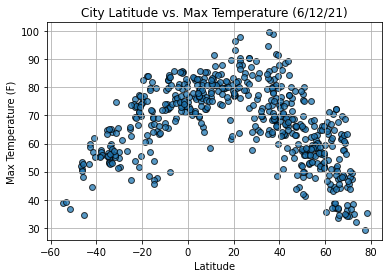

In [41]:
#generate plot with average tumor volume and weight
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Max Temperature', kind = 'scatter', title = 'City Latitude vs. Max Temperature (6/12/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#format and label y axis
ax.set_ylabel('Max Temperature (F)')

#print plot and clear variables
plt.show()

## Latitude vs. Humidity Plot

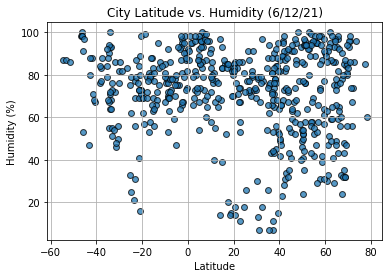

In [42]:
#generate plot with average tumor volume and weight
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Humidity', kind = 'scatter', title = 'City Latitude vs. Humidity (6/12/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#format and label y axis
ax.set_ylabel('Humidity (%)')

#print plot and clear variables
plt.show()

## Latitude vs. Cloudiness Plot

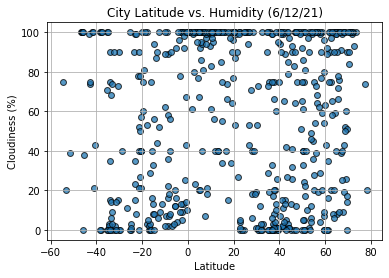

In [43]:
#generate plot with average tumor volume and weight
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Cloudiness', kind = 'scatter', title = 'City Latitude vs. Humidity (6/12/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#format and label y axis
ax.set_ylabel('Cloudiness (%)')

#print plot and clear variables
plt.show()

## Latitude vs. Wind Speed Plot

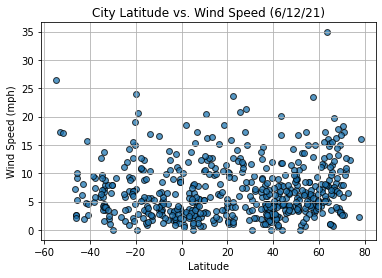

In [45]:
#generate plot with average tumor volume and weight
ax = cities_weather_clean.plot(x = 'Latitude', y = 'Wind Speed', kind = 'scatter', title = 'City Latitude vs. Wind Speed (6/12/21)', grid = True, s = 35, alpha = .75, edgecolor = 'k')

#format and label y axis
ax.set_ylabel('Wind Speed (mph)')

#print plot and clear variables
plt.show()

## Linear Regression

In [73]:
north_weather = cities_weather_clean.loc[cities_weather_clean['Latitude'] > 0, :]
south_weather = cities_weather_clean.loc[cities_weather_clean['Latitude'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Latitude and Maximum Temperature in the Northern Hemisphere is -0.7184160289668334



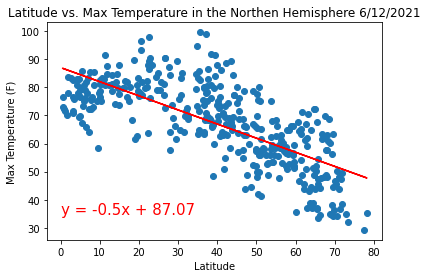

In [74]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Max Temperature']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Maximum Temperature in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (0,35), fontsize=15, color="red")
plt.title('Latitude vs. Max Temperature in the Northen Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#print plot and clear variables
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The correlation between Latitude and Maximum Temperature in the Southern Hemisphere is 0.744817603877558



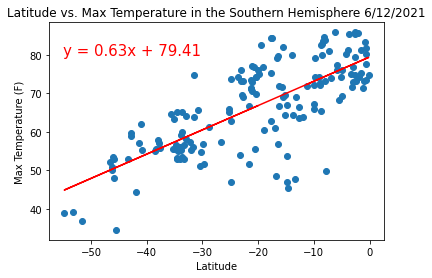

In [75]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Max Temperature']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Maximum Temperature in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-55,80), fontsize=15, color="red")
plt.title('Latitude vs. Max Temperature in the Southern Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#print plot and clear variables
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Latitude and Humidity in the Northern Hemisphere is -0.09697860544560585



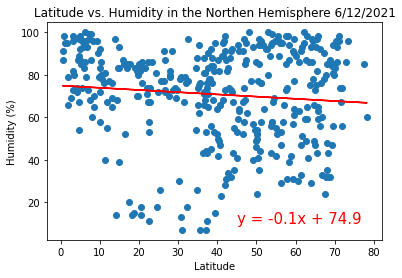

In [76]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Humidity']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Humidity in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (45,10), fontsize=15, color="red")
plt.title('Latitude vs. Humidity in the Northen Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#print plot and clear variables
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


The correlation between Latitude and Humidity in the Southern Hemisphere is 0.017386234842421463



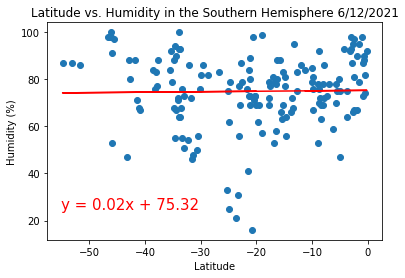

In [77]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Humidity']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Humidity in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.title('Latitude vs. Humidity in the Southern Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

#print plot and clear variables
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Latitude and Cloudiness in the Northern Hemisphere is -0.138660413466613



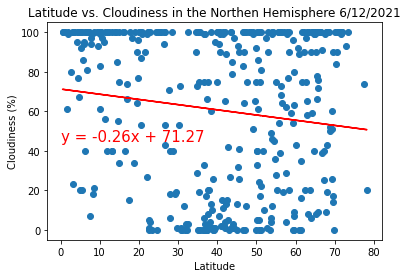

In [78]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Cloudiness']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Cloudiness in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (0, 45), fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness in the Northen Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#print plot and clear variables
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The correlation between Latitude and Cloudiness in the Southern Hemisphere is -0.006188256834000847



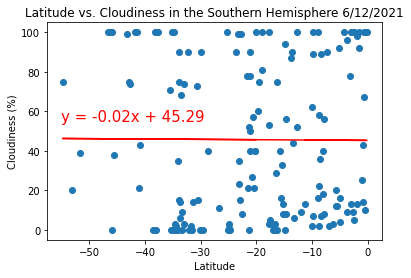

In [79]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Cloudiness']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Cloudiness in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-55, 55), fontsize=15, color="red")
plt.title('Latitude vs. Cloudiness in the Southern Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

#print plot and clear variables
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Latitude and Wind Speed in the Northern Hemisphere is 0.13118904646481516



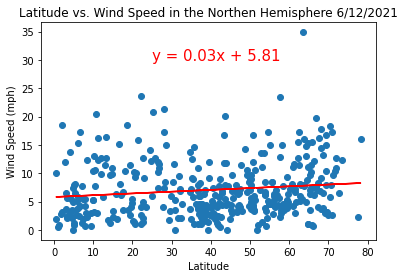

In [80]:
#define x and y values
x_values = north_weather['Latitude']
y_values = north_weather['Wind Speed']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Wind Speed in the Northern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (25, 30), fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed in the Northen Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#print plot and clear variables
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The correlation between Latitude and Wind Speed in the Southern Hemisphere is -0.18629478152506762



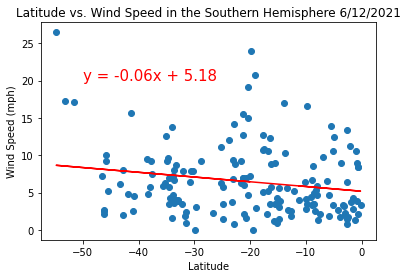

In [81]:
#define x and y values
x_values = south_weather['Latitude']
y_values = south_weather['Wind Speed']

#calculate and print correlation coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"\nThe correlation between Latitude and Wind Speed in the Southern Hemisphere is {correlation[0]}\n")

#calculate linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#define linear regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

#generate scatter plot
plt.scatter(x_values, y_values)

#generate regression line
plt.plot(x_values, regress_values,"r-")

#format labels
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.title('Latitude vs. Wind Speed in the Southern Hemisphere 6/12/2021')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

#print plot and clear variables
plt.show()